In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
#Add tab seperator
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [9]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
lemmatizer = WordNetLemmatizer()

In [7]:
#Function for datacleaning 
def datacleaning(x):
#---------------------------------------------------------------------------------------------------------------------------    
    #Removing stop words.
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
      if i in stopwords.words("english"): 
         pass
      else:
         temp.append(i)
    my_new_string=' '.join(temp)
#---------------------------------------------------------------------------------------------------------------------------        
    #Lemmatizing the data.
    c=nltk.word_tokenize(my_new_string)
    my_list=[]
    for i in c:
        my_list.append(lemmatizer.lemmatize(i))
        my_new_string_second=' '.join(my_list)
#---------------------------------------------------------------------------------------------------------------------------            
    #Removing the numbers from the data.
        temp=[]
    for i in my_new_string_second:
      if i.isdigit(): 
         pass
      else:
        temp.append(i)
    hi=''.join(temp)
    return (hi.lower()) #Converting the data to lower case

In [10]:
df['Review_new'] = df['Review'].apply(datacleaning)

In [18]:
x = df['Review_new']

In [19]:
#Vectorizing the data
vectorizer = CountVectorizer()
vectorizer.fit(x)

CountVectorizer()

In [20]:
vectorizer.get_feature_names_out()[0:100]

array(['absolute', 'absolutely', 'absolutley', 'accident',
       'accommodation', 'accomodate', 'accordingly', 'accountant', 'ache',
       'acknowledged', 'across', 'actual', 'actually', 'added',
       'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead',
       'airline', 'airport', 'ala', 'albondigas', 'all', 'allergy',
       'almond', 'almost', 'alone', 'also', 'although', 'always',
       'amazing', 'ambiance', 'ambience', 'amount', 'ample', 'an', 'and',
       'andddd', 'angry', 'annoying', 'another', 'anticipated', 'any',
       'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways',
       'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently',
       'appealing', 'appetite', 'appetizer', 'appetizers', 'apple',
       'approval', 'are', 'area', 'arepas', 'aria', 'around', 'array',
       'arrived', 'arrives', 'arriving', 'article', 'as', 'ask', 'asked',
       'asking', 'assure', 'at', 'ate', 'atmosphere', 'atrocious',
       'attached', 'attack', 

In [22]:
vectorizer.transform(x)

<1000x1846 sparse matrix of type '<class 'numpy.int64'>'
	with 6005 stored elements in Compressed Sparse Row format>

In [24]:
X_vectors = vectorizer.transform(x)

In [25]:
vectorizer.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [27]:
km = KMeans(n_clusters=5)

In [28]:
km_model = km.fit(X_vectors)

In [29]:
y_km = km.predict(X_vectors)

In [30]:
y_km

array([4, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 4, 1, 0, 4, 2,
       2, 0, 0, 2, 1, 0, 1, 0, 4, 1, 0, 1, 0, 0, 0, 4, 1, 4, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 1, 4, 0, 4, 0, 0, 0, 4, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 4, 0, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 4, 2, 1, 2, 0, 0, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 4, 1, 0, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 2,
       0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 4, 1, 0,

In [31]:
km.labels_

array([4, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 4, 1, 0, 4, 2,
       2, 0, 0, 2, 1, 0, 1, 0, 4, 1, 0, 1, 0, 0, 0, 4, 1, 4, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 1, 4, 0, 4, 0, 0, 0, 4, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 4, 0, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 4, 2, 1, 2, 0, 0, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 4, 1, 0, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 2,
       0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 4, 1, 0,

In [32]:
km.cluster_centers_

array([[0.00147929, 0.00739645, 0.00147929, ..., 0.        , 0.00591716,
        0.00739645],
       [0.        , 0.01775148, 0.        , ..., 0.01183432, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

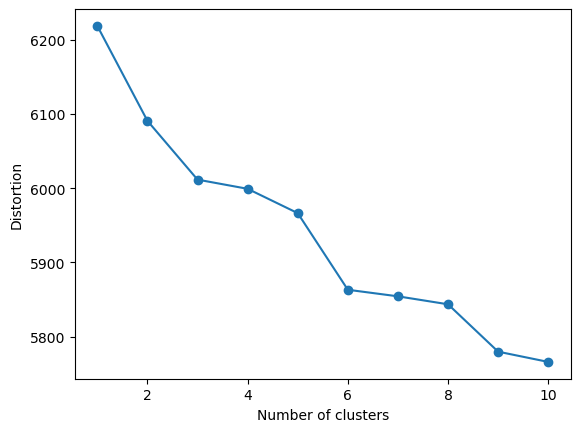

In [33]:
#Plotting chart for clustering
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_vectors)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()